<a href="https://colab.research.google.com/github/pamlima00/mba_dsa30_dlaa_trabalho_final/blob/main/trabalho_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10 #(50000, 32X32)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
n_classes = 10

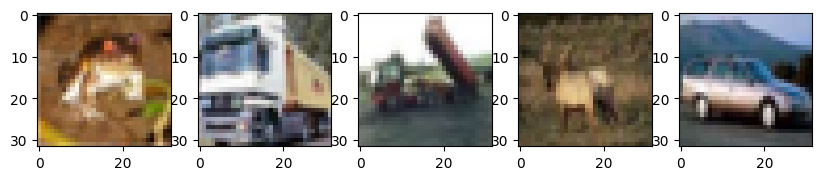

In [8]:
fig = plt.figure()
for i in range(5):
    a = fig.add_subplot(1, 5, i + 1)
    img_num = np.random.randint(x_train.shape[0])
    image = x_train[i]
    id = y_train[i]
    plt.imshow(image)
fig.set_size_inches(10,10)
plt.show()

In [9]:
# Encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 266s 336ms/step - accuracy: 0.3406 - loss: 1.7812 - val_accuracy: 0.5941 - val_loss: 1.1405
Epoch 2/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 338ms/step - accuracy: 0.5896 - loss: 1.1500 - val_accuracy: 0.6705 - val_loss: 0.9355
Epoch 3/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 308s 320ms/step - accuracy: 0.6681 - loss: 0.9466 - val_accuracy: 0.7090 - val_loss: 0.8414
Epoch 4/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 331ms/step - accuracy: 0.7072 - loss: 0.8315 - val_accuracy: 0.7275 - val_loss: 0.7801
Epoch 5/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 254s 321ms/step - accuracy: 0.7367 - loss: 0.7467 - val_accuracy: 0.7488 - val_loss: 0.7344
Epoch 6/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 331ms/step - accuracy: 0.7529 - loss: 0.6930 - val_accuracy: 0.7552 - val_loss: 0.6990
Epoch 7/7
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 318ms/step - accuracy: 0.7780 - loss: 0.6323 - val_accuracy: 0.7724 - val_loss: 0.6737


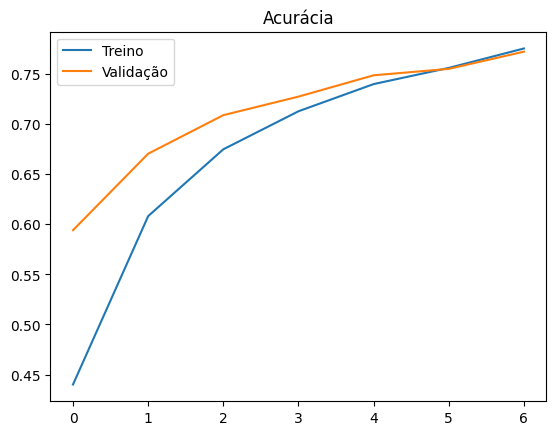

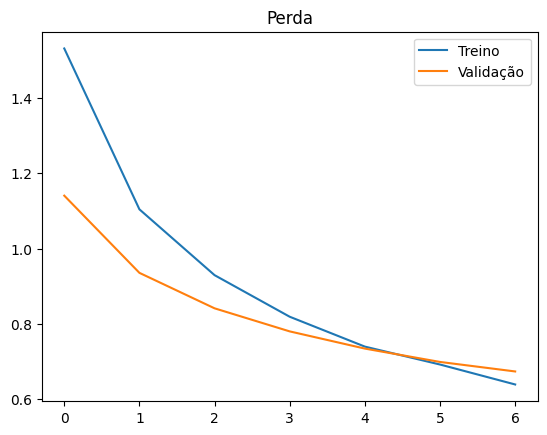

In [11]:
# Montando uma rede neural que atinja pelo menos 75% de acurácia no CIFAR-10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compliando o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback pra parar automaticamente quando atingir a acurácia ideal
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)


# Treinamento
history = model.fit(
    x_train, y_train,
    epochs=7,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# Plot de resultados

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


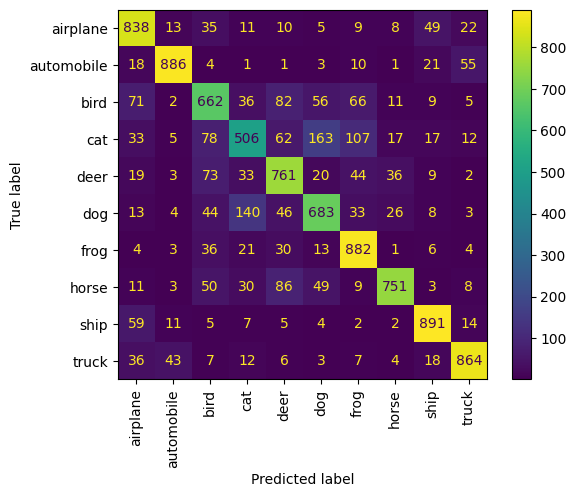

In [12]:
# Realizando as previsões
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])
disp.plot(xticks_rotation='vertical')
